## Data representation for neural networks

Data stored in multidimensional Numpy arrays are called *tensors*. A tensor  is a container for data, almost always numerical data. Matrices are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions.

### Scalars (0D tensors)

A tensor that contains only one number is called a *scalar*.
In Numpy, a `float32` or `float64` number is a scalar tensor. You can display the number of axes of a Numpy tensor via the `ndim` attribute. The number of axes of a tensor is also called *rank*.

In [2]:
import numpy as np

In [2]:
x = np.array(12)

In [3]:
x

array(12)

In [4]:
x.ndim

0

### Vectors (1D tensors)

An array of numbers is called a *vector*, or 1D tensor. A 1D tensor is said to have exactly one axis.

In [5]:
x = np.array([12,3,6,14])

In [6]:
x

array([12,  3,  6, 14])

In [7]:
x.ndim

1

This vector has five entries and so is called a *5-dimensional vector*.
**Don't confuse a 5D vector with a 5D tensor!**
A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis).

*Dimensionality* can denote either the number of entries along a specific axis or the number of axes in a tensor.

It's technically more correct to talk about a *tensor of rank 5*.

### Matrices (2D tensors)

An array of vectors is a *matrix*,or 2D tensor. A matrix has two axes. You can visually interpret a matrix as a rectangular grid of numbers. This is a Numpy matrix:

In [8]:
x = np.array([
        [5,78,2,34,0],
        [6,79,3,35,1],
        [7,80,4,36,2]
    ])

In [9]:
x.ndim

2

The entries of the first axis are called the *rows*, and the entries from the seconnd axis are called the *columns*.

### 3D tensors and higher-dimensional tensors.

In [4]:
x = np.array([[[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]]])

In [6]:
x.ndim

3

### Key attributes

A tensor is defined by three key attributes:
- *Number of axes (rank)*: For instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor's `ndim` in Python libraries such as Numpy.
- *Shape*: This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3,5), and the 3D tensor example has shape (3,3,5). A Vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
- *Data type* (usuaylly called `dtype` in Python libraries): This is the type of data contained in the tensor; for instance, a tensorś type could be `float32`, `uint8`, `float64`. On rare occasions, you may see a char tensor. Note that string tensors don't exist in Numpy, because tensors live in preallocated, contiguos memory segments: and strings, being variable length, would preclude the use of this implementation.

Let's look at the MNIST datased:

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Next, we display the numberof axes of the tensor `train_images`, the `ndim` attribute:

In [3]:
print(train_images.ndim)

3


Here's the shape:

In [4]:
print(train_images.shape)

(60000, 28, 28)


And this is its data type, the `dtype` attribute:

In [6]:
print(train_images.dtype)

uint8


Let's display the fourth digit in this 3D tensor, using the library Matplotlib:

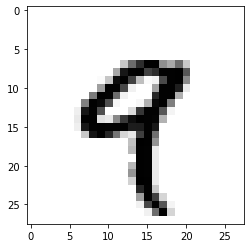

In [9]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in Numpy

In the previous example, we selected a specific digit alongside the first axis using the syntax `train_images[i]`. Selecting specific elements in a tensor is called *tensor slicing*.
Tensor-slicing operations you can do on Numpy arrays.

The following examples selects digits #10 to #100 (#100 isn't included) and puts them in an array of shape (90,28,28):

In [10]:
my_slice = train_images[10:100]

In [11]:
print(my_slice.shape)

(90, 28, 28)


It's equivalent to this more detailed notation, which specifies a start index and stop index for the slice along each tensor axis. Note the :  is equivalent to selecting th entire axis.

In [12]:
my_slice = train_images[10:100, :, :]

In [13]:
my_slice.shape

(90, 28, 28)

In [14]:
my_slice = train_images[10:100, 0:28, 0:28]

In [15]:
my_slice.shape

(90, 28, 28)

It's also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of 14 x 14 pixels centered in the middle, you do this:

In [17]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

The first axus in all data tensors you'll come across in deep learning will be the *sample axis*.

In the MNIST example, samples are images of digits.
In addition, deep-learning models don't process an entire dataset at once; rather, they break the data into small batches. 

Here's one batch of our MNIST digits, with batch size of 128:

In [18]:
batch = train_images[:128]

The next batch:

In [20]:
batch = train_images[128:256]

And the $n$th batch:

In [22]:
n = 1

In [26]:
batch = train_images[(128 * n) : (128 * (n + 1))]

When considering such a batch tensor, the first axis is alled $batch axis$ or $batch dimension$.

### Real-world examples of data tensors

The data you'll manipulate will almost always fall into one of the following categories:

- **Vector data**: 2D tensors of shape (samples, features) 
- **Timeseries data or sequence data**: 3D tensors of shape (samples, timesteps,features)
- **Images**: 4D tensors of shape (samples, height, width, channels) or (samples,channels, height, width)
- **Video**: 5D tensor of shape (sample, frames, height, width, channels) or (samples, frames, channels, height, width)

### Vector data

Each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor. Where the first axis is the **samples axis** and the second axis is the **feature axis**.
Examples:
- An actuarial dataset of people, where we consider each person's age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a 2D tensor of shape (10000,3).

- A dataset of text documents, where we represent each document by the counts of how many times each word appears in it. Each document can be encoded as a vector od 20,000 values, and thus an entire dataset of 500 documentos can be stored in a tensor of shape (500,20000).

### Timeseries data or sequence data

Whenever time matters in your data, it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vectors, and thus a batch of data will be encoded as a 3D tensor.

The time is always the second axis.

Examples:
- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading, and 250 days' worth of data can ve stored in a 3D tensor of shape. Here, each sample would be one day's worth of data.
- A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vetor except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded a 2D tensor of shape (280,128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

### Image data

Images typically have three dimensions: height, width, and color depth. Although grayscale images have only a single color channel and could thus be stored in 2D tensors.
There are two conventions for shapes of images tensors: the **channels-last** convention (used by TensorFlow) and the **channels-first** conventions (used by Theano). The TensorFlowr machine-learning framework, from Google, places color-depth axis at the end: `(samples, height, width, color_depth)`. Meanwhile, Theano places the color depth axis right after the batch axis: `(samples, color_depth, height, width)`.
The Keras framework provides support for both formats.

### Video data

Video data is one of the few types of real-world data for which you'll need 5D tensors. 
A video an be understood as a sequence of frames, each frame being a color image.Because each frame can be stored un a 3D tensor `(height, width, color_depth)`, a sequence of frames can be stored in a 4D tensor `(frames, height, width, color_depth)`, and thus a batch of different videos can be stored in a 5D tensor of shape `(samples, frames, height, width, color_depth)`.

### The gears of neural networks: tensor operations
### Element-wise operations

**Element-wise** operations are applied independently to each entry in the tensors being considered. This means this operations are highly amenavble to massively parallel implementations.

### Broadcasting
What happens with addition when the shapes of the two tensors being added differ?
When possible, and if there's no ambiguity, the smaller tensor will be **broadcasted** to match the shape of the larger tensor. Broadcasting consists of two steps:
1. Axes (called *broadcast axes*) are added to the smaller tensor to match the `ndim` of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

### Tensor dot
The dot operation, also called **tensor product** (not be confused with an element-wise product) is the most common, most useful tensor operation. Contrary to element-wise operations, it combines entries in the input tensors.
An element-wise product is done with the * operator in Numpy, Keras, Theano, and TensorFlow. `dot` uses a different syntax in TensorFlow, but in both Numpy and Keras it's done using the standart `dot` operator:

In [29]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
z = np.dot(x, y)
z

55

### Tensor reshaping
Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial tensor. Reshaping is best understood via simple examples:

In [30]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

In [31]:
print(x.shape)

(3, 2)


In [32]:
x = x.reshape((6,1))

In [33]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [34]:
x = x.reshape((2,3))

In [35]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that's commonly encountered is **transposition*.

**Transposing** a matrix means exchanging its rows and its columns, so that `x[i,:]` becomes `x[:,i]`:

In [36]:
x = np.zeros((300,20))

In [37]:
x = np.transpose(x)

In [38]:
print(x.shape)

(20, 300)


### The engine of neural networks: gradient-based optimization
As you saw in the previous section, each neural layer from out first network example transforms its input data as follows:

`output = relu(dot(W,input) + b)`

In this expression, W and b are tensors that are attributes of the layer. They're called **weights** or **trainable parameters** of the layer (the **kernel** and **bias** attributes, respectively). 

Initially=, these weight matrices are filled with small random values (a step called **random initialization**).

What comes next is to gradually adjust these weights, based on a feedback signal. This gradual adjustment, also called **training**, is basically the learning that machine learning is all about.
This happens within what's called a  **training loop**, which works as follows. Repeat these steps in a loop, as long as necessary.

1. Draw a batch of training samples `x` and corresponding target `y`.
2. Run the network on `x` (a step called **forward pass**) to obtain predictions `y_pred`.
3. Compute the loss of the network on the batch, a measure of the mismatch between `y_pred` and `y`.
4. Update all weigths of the network in a way that slightly reduces the loss on this batch.